# Lab 1: Part C: Bayesian Approach
In this final part of the lab we will explore Bayesian parameter estimation. The ML and MAP solutions only give a point estimate of the parameters; whereas, the Bayesian approach gives a full distribution over the parameter space. Additionally, by using a conjugate prior we are guaranteed a closed form expression for this posterior distribution over the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from normal_inv_gamma import *
from plot_normal import *

In [2]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 1  # standard deviation = sqrt(variance)
N = 5      # number of datapoints

X = mu + sigma*np.random.randn(N,1)

In [3]:
# hyperparameters for prior - normal inverse gamma
alpha = 1
beta = 1
gamma = 1
delta = 0

## Parameters for posterior

### TODO 1
Define the parameters for the Bayesian posterior. Consult lecture notes.

In [4]:
gammaP = gamma + N
deltaP = (gamma*delta + np.sum(X))/(gamma + N)
alphaP = alpha + N/2
betaP = np.sum(X**2)/2 + beta + (gamma*delta**2)/2-(gamma*delta+np.sum(X))**2/2*(gamma + N)

## ML + MAP parameter estimation of univariate normal

While we calculate the conjugate prior we are also going to brute force the posterior for some nice plots.

### TODO 2
Fill these equations from the previous section `prac1_b`.

In [5]:
muMAP = (np.sum(X)+gamma*delta)/(N+gamma)
sigmaMAP = (np.sum((X-muMAP)**2)+2*beta+gamma*(delta-muMAP)**2)/(N+3+2*alpha)
muML = np.mean(X)
sigmaML = np.std(X)

## Likelihood function

In [6]:
sigma_range = np.linspace(0.02, 2., num=200)
mu_range = np.linspace(-2., 2., num=400)

conj_posterior = np.zeros((len(sigma_range), len(mu_range)))
lfun = np.zeros((len(sigma_range), len(mu_range)))
prior = np.zeros((len(sigma_range), len(mu_range)))

for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        
        # here we are just brute forcing for the posterior (as before)
        lfun[j,i] = normal(X, m, s)
        prior[j,i] = normal_inv_gamma(alpha, beta, delta, gamma, m, s)
        
        # TODO 3 - Compute the posterior given the new closed form expression, consult lecture notes, 
        # this is our closed form solution
        
        conj_posterior[j,i] = normal_inv_gamma(alphaP, betaP, deltaP, gammaP, m, s)

/Users/maggie/Desktop/machine vision/lab/01_FittingProbDistribs_Python/normal_inv_gamma.py:20: RuntimeWarning: invalid value encountered in double_scalars
  B = beta**alpha/gamma_function(alpha)


### TODO 4
Estimate the posterior (brute force way). Bayes Rule... 

In [7]:
posterior = (lfun*prior)/np.sum(lfun * prior)

### TODO 5
Look at the plots and verify that the peak of this distribution again corresponds to the MAP solution

//anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
//anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
//anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
//anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
//anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:885: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
//anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


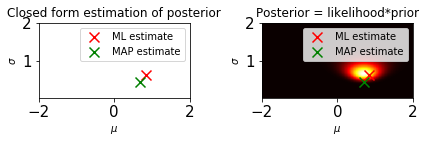

In [8]:
# Plot posterior
plt.subplot(1,2,1)
plt.imshow(conj_posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Closed form estimation of posterior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()


# Plot posterior
plt.subplot(1,2,2)
plt.imshow(posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Posterior = likelihood*prior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()

plt.tight_layout()

### BONUS TODO 5
Write code to estimate the probability that a new data point belongs to the same model. Compare the ML, MAP and fully Bayesian methods to do this. What are the advantages of using the Bayesian approach?